In [ ]:
!pip install diffusers transformers torch accelerate pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.6 MB/s eta 0:00:00


In [ ]:
import os

os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import os
import warnings
import logging
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import display
import random

# Suppress future warnings and reduce extra logging messages
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("diffusers").setLevel(logging.ERROR)


Welcome to the AI Avatar Generator!
Describe your personality (e.g., 'creative, adventurous, friendly'): angry
Enter the preferred style for your avatar (e.g., 'cartoon', 'realistic', 'digital art') [default 'cartoon']: 
Enter guidance scale [default 7.5]: 
Enter number of inference steps [default 50]: 1
Enter output filename [default outputs/ai_avatar.png]: 
Prompt: A portrait of a digital avatar representing a angry personality in cartoon style, highly detailed, expressive, modern art
Random seed: 1552577355


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]


Avatar saved as: outputs/ai_avatar.png


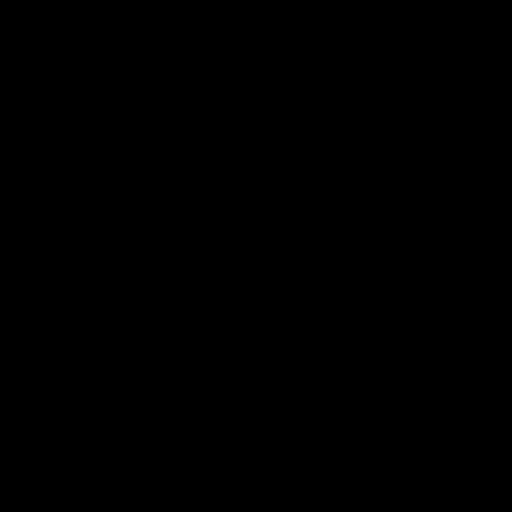

Avatar generation complete!


In [ ]:
def generate_avatar(personality: str, style: str = "cartoon", output_path: str = "outputs/ai_avatar.png",
                    guidance_scale: float = 7.5, num_inference_steps: int = 50):
    """
    Generates an AI avatar based on a personality description and a chosen art style.

    Parameters:
      personality (str): A brief description of your personality (e.g., "creative, adventurous, friendly").
      style (str): The artistic style for your avatar (e.g., "cartoon", "realistic", "digital art").
      output_path (str): Path where the output image is saved.
      guidance_scale (float): Controls how strictly the model follows the prompt.
      num_inference_steps (int): Number of inference steps (more steps may increase detail).

    """
    # Create a prompt that combines the personality and style.
    prompt = f"A portrait of a digital avatar representing a {personality} personality in {style} style, highly detailed, expressive, modern art"
    # Generate a random seed for variability.
    seed = random.randint(0, 2**32 - 1)
    if torch.cuda.is_available():
        generator = torch.Generator("cuda").manual_seed(seed)
    else:
        generator = torch.Generator().manual_seed(seed)

    print("Prompt:", prompt)
    print("Random seed:", seed)

    model_id = "runwayml/stable-diffusion-v1-5"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the text-to-image pipeline.
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16 if device=="cuda" else torch.float32
    )
    pipe = pipe.to(device)

    # Generate the avatar.
    result = pipe(
        prompt=prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=generator
    )
    avatar = result.images[0]

    # Ensure the output directory exists.
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    avatar.save(output_path)
    print(f"\nAvatar saved as: {output_path}")

    # Display the generated avatar inline.
    display(avatar)

In [ ]:
def main():
    print("Welcome to the AI Avatar Generator!")
    personality = input("Describe your personality (e.g., 'creative, adventurous, friendly'): ").strip()
    style = input("Enter the preferred style for your avatar (e.g., 'cartoon', 'realistic', 'digital art') [default 'cartoon']: ").strip()
    if not style:
        style = "cartoon"

    try:
        guidance_input = input("Enter guidance scale [default 7.5]: ").strip()
        guidance_scale = float(guidance_input) if guidance_input else 7.5
    except ValueError:
        print("Invalid guidance scale input; using default 7.5.")
        guidance_scale = 7.5

    try:
        steps_input = input("Enter number of inference steps [default 50]: ").strip()
        num_inference_steps = int(steps_input) if steps_input else 50
    except ValueError:
        print("Invalid number of steps; using default 50.")
        num_inference_steps = 50

    output_path = input("Enter output filename [default outputs/ai_avatar.png]: ").strip()
    if not output_path:
        output_path = "outputs/ai_avatar.png"

    generate_avatar(personality, style, output_path, guidance_scale, num_inference_steps)
    print("Avatar generation complete!")


In [ ]:
if __name__ == "__main__":
    main()